# Decision Tree Classifer
In this notebook, we will look into the application of a Decision Tree Classifer on the <b> Wine Dataset </b> (https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data) using <b> Sklearn </b> library. We will also visualize the decision tree created with the help of <b> Graphviz </b> library

In [22]:
#Importing the required libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from graphviz import Source
from IPython.display import Image
from IPython.display import display
from ipywidgets import interactive

In [23]:
#Loading the data and getting the train-test splits
wine = datasets.load_wine()
X,y = pd.DataFrame(wine.data,columns=wine.feature_names),pd.DataFrame(wine.target,columns=['label'])
X_train,X_test,y_train,y_test = train_test_split(X,y)
print("Size of train set: ",len(X_train))
print("Size of test set: ", len(X_test))
print("Sample training data:")
pd.concat((X_train,y_train),axis=1).head(6)

Size of train set:  133
Size of test set:  45
Sample training data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
94,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.250000,1.16,2.96,345.0,1
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.350000,0.89,2.06,520.0,2
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.210000,0.99,3.13,886.0,1
124,11.87,4.31,2.39,21.0,82.0,2.86,3.03,0.21,2.91,2.800000,0.75,3.64,380.0,1
156,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.010000,0.57,1.64,480.0,2


In [24]:
#Training the classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

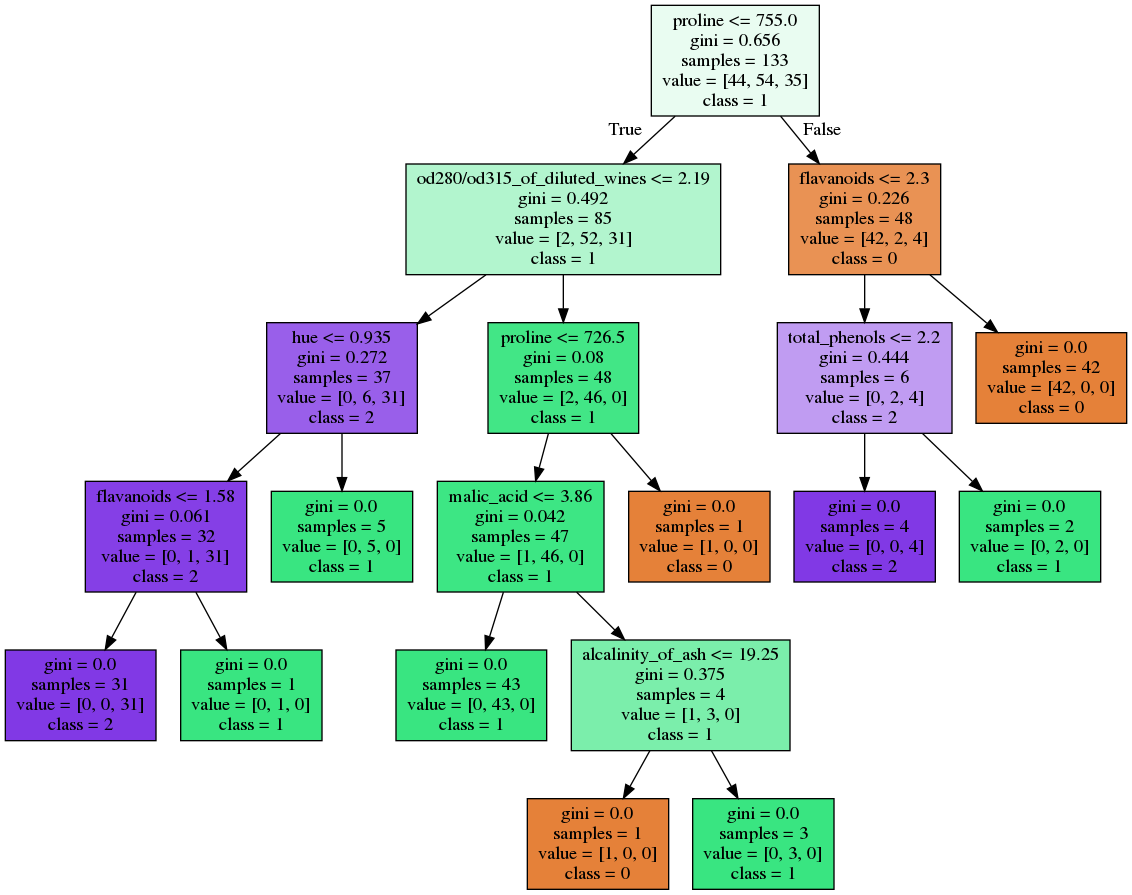

In [25]:
#Visualizing the decision tree
graph = Source(export_graphviz(classifier, out_file=None
   , feature_names=wine.feature_names, class_names=['0', '1', '2'] 
   , filled = True))
display(Image(graph.pipe(format='png')))

Accuracy:  0.8444444444444444
Macro F1 score:  0.845752813494749


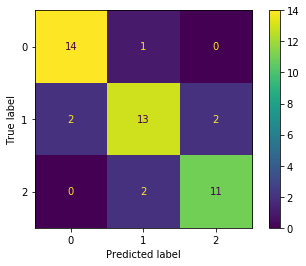

In [26]:
#Evaluating the model on test data
y_pred = classifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Macro F1 score: ", f1_score(y_test,y_pred,average='macro'))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Experimenting with Maximum Depth of the tree
In the section below, you can adjust the maximum depth of the tree and observe the effect it has on the accuracy and F1 score on the test data. It may be the case that you get the best accuracy for a smaller value of "maximum depth". This suggests that the model overfits when the maximum depth is increased beyong this point. This is a very common practice known as <b> Pruning </b> of the Decision Tree, where we remove the last few layers before evaluating the model on the test data

In [27]:
def plot_tree(depth):
    classifier = DecisionTreeClassifier(random_state=0, max_depth = depth)
    classifier.fit(X_train, y_train)
    graph = Source(export_graphviz(classifier, out_file=None
           , feature_names=wine.feature_names, class_names=['0', '1', '2'] 
           , filled = True))
    display(Image(graph.pipe(format='png')))
    y_pred = classifier.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print("Macro F1 score: ", f1_score(y_test,y_pred,average='macro'))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [28]:
inter=interactive(plot_tree , depth=[1,2,3,4,5,6,7,8,9,10])
display(inter)

interactive(children=(Dropdown(description='depth', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1), Output(…